<a href="https://colab.research.google.com/github/san2003/my_predict_Stock_Exchange/blob/main/previsor_de_bolsa_de_valores_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#para carregar dados 
from google.colab import files
uploaded = files.upload()

Saving ^IXIC.csv to ^IXIC (1).csv


In [ ]:
#armazenar dados em banco de dados
df = pd.read_csv('^IXIC.csv') 
df .head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-29,8682.009766,8697.320313,8664.040039,8665.469727,8665.469727,1099090000
1,2019-12-02,8672.839844,8672.839844,8540.160156,8567.990234,8567.990234,2225940000
2,2019-12-03,8460.719727,8523.980469,8435.400391,8520.639648,8520.639648,2308600000
3,2019-12-04,8557.450195,8584.879883,8552.379883,8566.669922,8566.669922,2150680000
4,2019-12-05,8587.929688,8588.889648,8541.919922,8570.700195,8570.700195,2123380000
5,2019-12-06,8634.250000,8665.440430,8630.580078,8656.530273,8656.530273,2053530000


In [ ]:
#obter o número de dias de negociação
df.shape

(102, 7)

<function matplotlib.pyplot.show>

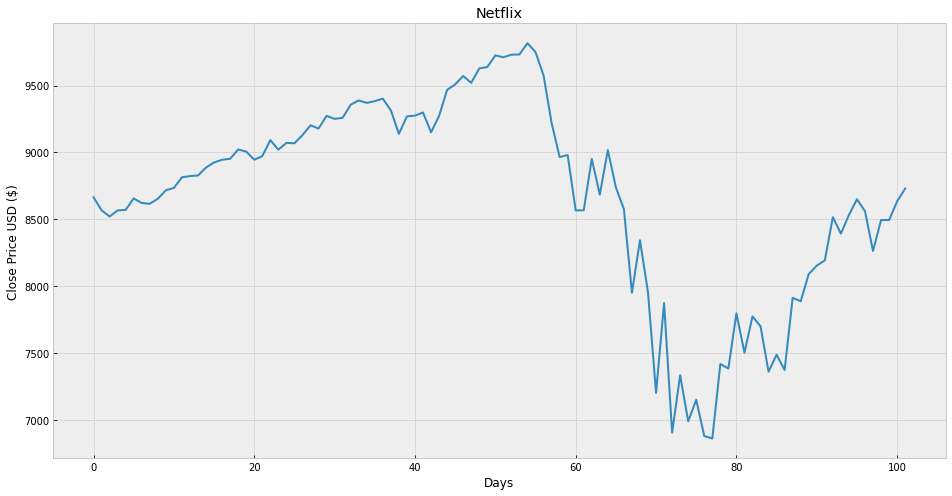

In [ ]:
#visualizar os dados de preços próximos
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show

In [ ]:
#obter o preço mais próximo
df = df[['Close']]
df.head(4)

,Close
0,8665.469727
1,8567.990234
2,8520.639648
3,8566.669922


In [ ]:
#crie uma variável para prever 'x' dias no futuro
future_days = 25          #o correto é 25 
#Criar uma nova coluna (destino) deslocou 'x' unidades / dias para cima
df ['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,8665.469727,9068.580078
1,8567.990234,9129.240234
2,8520.639648,9203.429688
3,8566.669922,9178.860352


In [ ]:
#Crie o conjunto de dados do recurso (X) e converta-o em um numpy aray e remova as últimas 'x' linhas / dias
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print (X)

[[8665.469727]
 [8567.990234]
 [8520.639648]
 [8566.669922]
 [8570.700195]
 [8656.530273]
 [8621.830078]
 [8616.179688]
 [8654.049805]
 [8717.320313]
 [8734.879883]
 [8814.230469]
 [8823.360352]
 [8827.740234]
 [8887.219727]
 [8924.959961]
 [8945.650391]
 [8952.879883]
 [9022.389648]
 [9006.620117]
 [8945.990234]
 [8972.599609]
 [9092.19043 ]
 [9020.769531]
 [9071.469727]
 [9068.580078]
 [9129.240234]
 [9203.429688]
 [9178.860352]
 [9273.929688]
 [9251.330078]
 [9258.700195]
 [9357.129883]
 [9388.94043 ]
 [9370.80957 ]
 [9383.769531]
 [9402.480469]
 [9314.910156]
 [9139.30957 ]
 [9269.679688]
 [9275.160156]
 [9298.929688]
 [9150.94043 ]
 [9273.400391]
 [9467.969727]
 [9508.679688]
 [9572.150391]
 [9520.509766]
 [9628.389648]
 [9638.94043 ]
 [9725.959961]
 [9711.969727]
 [9731.179688]
 [9732.740234]
 [9817.179688]
 [9750.969727]
 [9576.589844]
 [9221.280273]
 [8965.610352]
 [8980.780273]
 [8566.480469]
 [8567.370117]
 [8952.169922]
 [8684.089844]
 [9018.089844]
 [8738.589844]
 [8575.620

In [ ]:
#Crie o conjunto de dados de destino (Y), converta-o em uma matriz nupy e obtenha todos os valores de destino
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[9068.580078 9129.240234 9203.429688 9178.860352 9273.929688 9251.330078
 9258.700195 9357.129883 9388.94043  9370.80957  9383.769531 9402.480469
 9314.910156 9139.30957  9269.679688 9275.160156 9298.929688 9150.94043
 9273.400391 9467.969727 9508.679688 9572.150391 9520.509766 9628.389648
 9638.94043  9725.959961 9711.969727 9731.179688 9732.740234 9817.179688
 9750.969727 9576.589844 9221.280273 8965.610352 8980.780273 8566.480469
 8567.370117 8952.169922 8684.089844 9018.089844 8738.589844 8575.620117
 7950.680176 8344.25     7952.049805 7201.799805 7874.879883 6904.589844
 7334.779785 6989.839844 7150.580078 6879.52002  6860.669922 7417.859863
 7384.299805 7797.540039 7502.379883 7774.149902 7700.100098 7360.580078
 7487.310059 7373.080078 7913.240234 7887.259766 8090.899902 8153.580078
 8192.419922 8515.740234 8393.179688 8532.360352 8650.139648 8560.730469
 8263.230469 8495.379883 8494.75     8634.519531 8730.160156]


In [ ]:
# Divida os dados em 75% de treinamento e 25% de teste
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
#Criar os modelos
#Criar o modelo do regressor da árvore de decisões
tree =  DecisionTreeRegressor().fit(x_train, Y_train)
#Criar o modelo de regressão linear
lr = LinearRegression().fit(x_train, Y_train)


In [ ]:
#Obter as últimas linhas 'X' do conjunto de dados do recurso
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[9731.179688],
       [9732.740234],
       [9817.179688],
       [9750.969727],
       [9576.589844],
       [9221.280273],
       [8965.610352],
       [8980.780273],
       [8566.480469],
       [8567.370117],
       [8952.169922],
       [8684.089844],
       [9018.089844],
       [8738.589844],
       [8575.620117],
       [7950.680176],
       [8344.25    ],
       [7952.049805],
       [7201.799805],
       [7874.879883],
       [6904.589844],
       [7334.779785],
       [6989.839844],
       [7150.580078],
       [6879.52002 ]])

In [ ]:
#Mostrar a previsão da árvore de modelos
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression Prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)



[6860.669922 6860.669922 7384.299805 7797.540039 7502.379883 7774.149902
 7700.100098 7360.580078 9129.240234 9129.240234 9508.679688 7887.259766
 8090.899902 9383.769531 8192.419922 8515.740234 8393.179688 8532.360352
 8650.139648 8515.740234 8263.230469 8495.379883 8494.75     8650.139648
 8730.160156]

[8501.61073378 8501.29095803 8483.98823885 8497.55550283 8533.28816102
 8606.09561583 8658.48563778 8655.37712782 8740.27243243 8740.09013223
 8661.239753   8716.17277412 8647.73192171 8705.00503024 8738.39960219
 8866.45775269 8785.81028492 8866.17709827 9019.91287528 8881.9901978
 9080.8149803  8992.66358431 9063.34616992 9030.40844946 9085.95210642]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


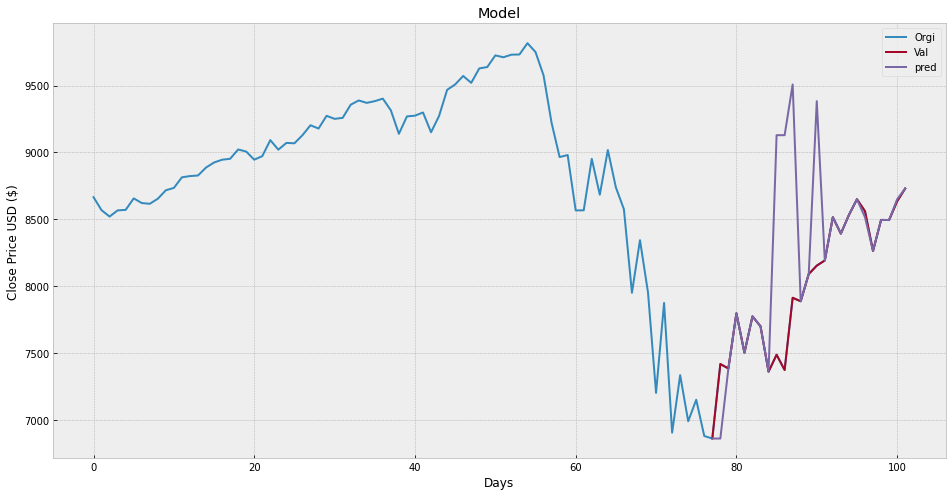

In [ ]:
#Visualise the data
Predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orgi', 'Val', 'pred'])
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


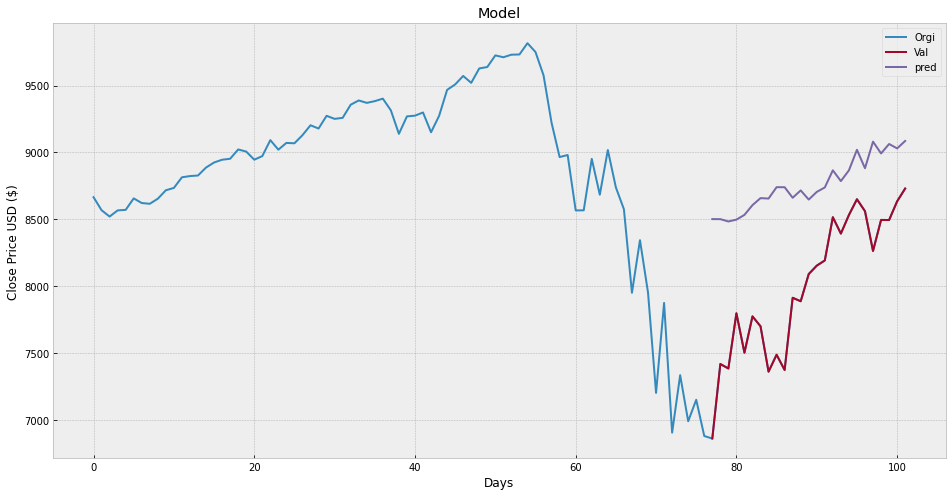

In [ ]:
#Visualise the data
Predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orgi', 'Val', 'pred'])
plt.show()